# Local Search in Discrete State and Action Spaces

For some search problems, the path to reach the goal is not
important.  Discovering a goal state or a state with the best value of
some objective function is the important part.  Such problems are
often called **optimization problems**.

What are some examples?

What is the best setting for a control on your stove to cook your soup
as quickly as possible without burning it? 

What is the best way to pack the words of a word cloud, or a [wordle](http://www.wordle.net|wordle)?  See an answer [here](https://stackoverflow.com/questions/342687/algorithm-to-implement-a-word-cloud-like-wordle).

What is the best way to divide up the computations of a matrix
calculation to be distributed across multiple cores?

**Local search** algorithms operate by maintaining a single state (or
set of pretty good states) and generating another state to try based
on this limited memory.  Some set of actions are available to modify a
state to another "neighboring" state.  It is a "neighbor" state in an
abstract graph of states connected by single actions.

Imagine all of the possible states for a problem laid out along a
line, along an x-axis.  The value of the objective function can be
plotted as a height above the points on the x-axis.  A local search
algorithm tries to find the state with the best height, where best
could be the maximal or minimal value depending on the search
problem.  The best value over all states is the **global optimum** (a
minimum or a maximum depending on the problem).

A local search algorithm is **complete** if it always finds a goal
state.  It is **optimal** if it always finds the optimum state, the
one with the global maximum or minimum.

# Hill-Climbing Search

This is our first example of a local search algorithm.  Imagine you
are climbing a mountain and you are in a very thick fog.  You can only
see a distance equal to one step length.  To try to climb you take the
step in the direction that is steepest to get to the highest
point of all the locations you can currently see.

In other words, hill-climbing search simply evaluates the objective
function for all states that are neighbors to the current state, and
takes the neighbor state with the best objective function value as the
new current state.  If there are more than one next best states, one
is picked randomly.

Hill-climbing search is sometimes called **greedy search**, because a
step is taken after only considering the immediate neighbors.  No time
is spent considering possible future states.

Hill-climbing is easy to formulate and implement and often finds
pretty good states quickly.  But, it has the following problems:

  * it gets stuck on local optima (hills for maximizing searches, valleys for minimizing searches,
  * it may get stuck on a ridge, if no single action can advance the search along the ridge,
  * it may get stuck wandering on a plateau for which all neighboring states have equal value.

Common variations include
  * allow sideways moves (when on a plateau)
  * stochastic hill-climbing: choose next state with probability related to increase in value of objective function
  * first-choice hill-climbing: generate neighbors by random choice of available actions and keep first state that has better value,
  * random-restart hill climbing: conduct multiple hill-climbing searches from multiple, randomly generated, initial states.

Only this last one, with random-restarts, is **complete**.  In the limit, all states will be tried as starting states so the goal, or best state, will eventually be found.

# The Eight-Queens Problem

Place eight queens on a chess board so that no queen is attacking
another.  Each queen must be in one of the 8 columns, so each queen
can be placed in one of the 8 rows, for a total of $8^8 \approx 17$
million states.  Actions are moving a single queen to a different row
in the same column.  The objective function is the number of pairs of
queens attacking each other.  This function is to be minimized, of
course.

Hill-climbing search as described only finds solutions 14% of the time, but solves those instances quickly, in an average of 4 steps.  When it gets stuck this is discovered in an average of 3 steps.

|  Hill-climbing Variations  |  Percent Solved  |  Steps to Find Solution  |  Steps to Know Failure  |
| :--: |:--: |:--: |:--: |
|   basic |  14%  |  4  |  3  |
|  with sideways moves |  94%  |  21  |  64  |
|  with restarts |  100%  |  22  |   |
|  with sidways moves and restarts |  100%  |  28  |  |

# Hard Problems

Hard ones for hill-climbing are ones with many local optima. NP-hard problems often have an exponential number of local optima, but states with pretty good value can often be found with a small number of restarts.

# Simulated Annealing

Hill-climbing searches will get stuck on local optima.  Only by adding
random restarts can you have a hill-climbing algorithm that is
complete.

To get off of a local optimum, a search must be defined to allow steps
that are "downhill" for maximizing searches, and "uphill" for
minimizing searches, away from the optimum.  

**Simulated annealing**
is an algorithm that does this probabilisitically.  Assume we are
doing a maximizing search, meaning we want to find the state with the
maximum value.  Let the value of
the current state be $v$.  Imagine an action has been applied to that
state and the resulting state has a lower (worse) value $v'$.  Simulated
annealing will accept this new state as the current state with
probability $e^{(v' - v)/T}$.  $T$ is like a "temperature", the higher
the value the more likely we are to take a step to a state with a
worse value. In practice, $T$ starts at a high value and is slowly
decreased towards zero.  If it is decreased "slowly enough", the
global optimum will be found with probabilty 1.  In other words, this is a
**complete** algorithm.

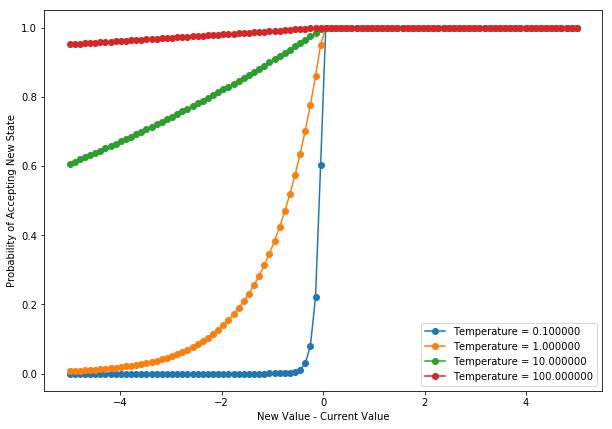

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def probOfAcceptance(dE, T):
    r = np.exp(dE/T)
    r[r>1] = 1.0
    return r
    
dE = np.linspace(-5, 5, num=100)

plt.figure(figsize=(10,7))
plt.clf()
legendText = []
for T in [0.1, 1, 10, 100]:
    plt.plot(dE, probOfAcceptance(dE,T), 'o-')
    legendText.append('Temperature = {:1f}'.format(T))
plt.xlabel('New Value - Current Value')
plt.ylabel('Probability of Accepting New State')
plt.legend(legendText,loc='lower right')

# Local Beam Search

The above searches keep just one state in memory.  **Local beam
search** keeps the best $k$ states in memory.  The successors of all
$k$ states are generated, and the best $k$ among them are kept.

A variant is **stochastic beam search** that selects the $k$ states to
keep as a probabilistic function of their values.  This search tends
to maintain more diversity in the set of kept $k$ states on each
iteration.

# Genetic Algorithms

**Genetic algorithms** are a lot like stochastic beam search.  A set
of $k$ states are kept.  The difference is in how successor states are
generated.  

Genetic algorithms generate successor states by combining parts of
good states to make new ones (the **crossover** operator) and by
randomly modifying parts (the **mutation** operator).  Then the values
of the new ones are used to select the best to keep for the next
iteration, or generation.

Many variations on representations of states as strings of symbols,
operators, and on ways of selecting winners for the next generation.

# Local Search in Continuous State and Action Spaces

## Without Derivatives of Value Function

### Binary Search

A monotonic function of  a single variable can be optimized using
binary search.

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/binarysearch.png" width=600>

Here is a useful application of binary search. 

### Effective Branching Factor

How can we compare the efficiency of different search algorithms, or of
the A\* algorithm using different heuristic functions?  We can use the
computation time and the maximum amount of memory used during the
search.  

It would also be nice to know how "focused" a search is.  If we use a
perfect heuristic function, we should get a search that won't explore
any nodes that do not lie on an optimal search path.

A measure related to this is the "effective branching factor".  The
branching factor of a tree is the number of children at each node.  If
this is not the same for all nodes, then we can find an average, or
"effective" branching factor.  

If we do a breadth-first (or depth-first) search on a tree like this

<img src="http://www.cs.colostate.edu/~anderson/cs440/notebooks/ebf.png">

we will have explored 1 + 3 + 6 = 10 nodes.  What is the effective
branching factor for this tree?  Or, stated mathematically, what is
the value of $b$ in

  $$ 1 + b + b^2 = 10$$

Now we can solve this for $b$.  What should the value be, roughly?
Solve it exactly.  What do you get?

We can solve this one exactly, but what if the search is 10 levels
deep?  We will have to do a search (yay!) to find the value of $b$.
How?  Could pick a whole bunch of values randomly.....

How about a binary search?  To start a binary search we need to pick a
low and high value of $b$ that we know bracket the true value.  For a
search that explored $n$ nodes to a maximum depth of $d$, what would
good low and high values be?  Now do a binary search between these two
values and for each new guess at $b$, calculate

$$  1 + b + b^2 + \cdots + b^d$$

and compare the result with the actual number of nodes, $n$.  Use the
comparison to continue the binary search.  Continue until the range of
possible values of $b$ are within a desired precision, such as $0.01$.  A faster way
to calculate the above quantity is

 $$ \frac{1-b^{d+1}}{1-b}$$

How would you derive this?

To estimate the effective branching factor, you could define a
function `def ebf(numberNodes, depth, precision=0.01)`. Then, to use it


    In [3]: ebf(100, 12, 0.01)
    Out[3]: 1.3034343719482422

    In [4]: ebf(0, 0)
    Out[4]: 0

    In [5]: ebf(1, 1,)
    Out[5]: 0.0078125

### Run and Twiddle

Take a step in a random direction from current state.  If value is
higher, keep going in that direction.  If value is lower, pick a new
random direction.  The "smallest" implementation of this algorithm is
found in [bacteria](http://www.pnas.org/content/99/1/7.full).

### Nelder-Mead Simplex Algorithm 

This is not in our text.  See the
[Scholarpedia
entry for Nelder-Mead](http://www.scholarpedia.org/article/Nelder-Mead_algorithm).  This maintains a set of $k$ good states.  To
generate one next state to evaluate, the worst of the $k$ states is
reflected through the centroid, or mean, of the $k$ states.  If the
new state is better than the worst of the $k$ states, it replaces the
worst state.

Also see the [Python
documentation for fmin function in scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html).

### CMA-ES 

Stands for [Covariance
Matrix Adaptation Evolution Strategy](http://www.lri.fr/~hansen/cmaesintro.html).  A Gaussian distribution is
fit to the set of good states and a new state is generated by sampling
probabilistically from the Gaussian distribution.  The Gaussian
distribution is updated when a new good state is found.
[Recent
results show](http://hal.archives-ouvertes.fr/docs/00/17/32/07/PDF/geccodcma.pdf) show that certain quasi-random methods are
computationally more efficient.

## With Derivatives of Value Function

When the  derivative of the value function with respect to each
component of the state can be calculated, then many derivative-based
searches are available.  If you know the slope at the current state,
you know which direction to go.  If you also know the second
derivative, you can make some intelligent guesses at how far to go.

If the state has multiple components, almost always the case, the
derivatives are gradients, and the second derivatives are Hessian
matrices.

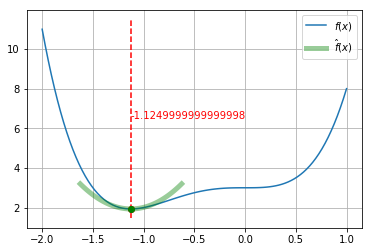

In [9]:
import time
import IPython.display as ipd  # for display and clear_output

def f(x):
    return 2 * x**4 + 3 * x**3 + 3

def df(x): 
    return 8 * x**3 + 9 * x**2

def ddf(x):
    return 24 * x**2 + 18*x

x = -2  # our initial guess
def taylorf(x,dx):
    return f(x) + df(x) * dx + 0.5 * ddf(x) * dx**2

x = -2  # first guess at minimum

xs = np.linspace(-2,1,num=100)

fig = plt.figure()

dxs = np.linspace(-0.5,0.5,num=100)

for rep in range(10):
    time.sleep(2) # sleep 2 seconds
    plt.clf()
    plt.plot(xs,f(xs))
    plt.grid('on')
    plt.plot(x+dxs, taylorf(x,dxs),'g-',linewidth=5,alpha=0.4)
    plt.plot(x,f(x),'ro')         
    y0,y1 = plt.ylim()
    plt.plot([x,x],[y0,y1],'r--')
    
    x = x - df(x) / float(ddf(x))
    plt.plot(x,f(x),'go')
    plt.text(x,(y0+y1)*0.5,str(x),color='r')
    plt.legend(('$f(x)$','$\hat{f}(x)$'))
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)

### Try these

4.1 What kind of search do we get from

  - Local beam search with $k=1$?
  - Local beam search with one initial state and no limit on the number of states retained?
  - Simulated annealing with $T=0$ at all times?
  - Simulated annealing with $T=\infty$?
  - Genetic algorithm with population size $k=1$?
  - Gradient-ascent in a discrete state and action space?
  - Nelder-Mead with $k=2$ in a two-dimensional state space?

# On-Line Search Algorithms (from Section 4.5)

For many real-world problems, an agent cannot predict the outcome of
applying an action in the current state.  It must take the action and
observe the new state.

An agent can end up in a dead-end from which it cannot recover.  We
will ignore this, and assume that a search problem is **safely
explorable**---some goal state is reachable from every reachable
state.

An on-line search agent cannot explore the successors to an arbitrary
node, but only the successors of the current node.  This is the nature
of depth-first so the authors adapt off-line dept-first search to
an on-line search algorithm.  Results of each action are stored in a
map that associates each state-action pair with the resulting state.
It assumes it is possible to undo, or reverse, each action in order to
backtrack.

An on-line version of A\* is **learning real-time A\* ** (LRTA\*).
Instead of maintaining memory of states as in the above depth-first
algorithm, LRTA\* only maintains a memory of the current best estimate
of cost to reach a goal for each node.  It updates this estimate after
each action is tried.  It assumes it can identify all successors for a
state and compare their remaining cost estimates.  An interesting
aspect is that all untried actions are assumed to result in a state
whose heuristic function value is correct, a feature called **optimism
under uncertainty**.

Learning better estimates of remaining cost based on single steps is
at the heart of **reinforcement learning**, covered in Chapter 21.